In [32]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d, CubicSpline, CubicHermiteSpline, lagrange
import matplotlib.pyplot as plt
from scipy.integrate import quad, dblquad, trapezoid, simpson

# Laboratorio 05: Cálculo Numérico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: ______
*Métodos computacionales 2025-I*

---

# 1.

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de Kirchhoff nos da la siguiente relación

$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
```


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H y la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [2]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente

#Creación del DataFrame

In [3]:
Data = {'Tiempo': [1.00, 1.01, 1.02, 1.03, 1.04],
        'Corriente' : [3.10, 3.12, 3.14, 3.18, 3.24]
        }
df = pd.DataFrame(Data)
df

,Tiempo,Corriente
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


#Código creado por el profesor para el método Tres Puntos

In [4]:
#Usando Tres puntos
def Derivada_Tres_Puntos(f, x, h):
    """
    Calcula la derivada de tres puntos para una función f en un conjunto de puntos x con paso h.

    Parámetros:
    - f: función a derivar.
    - x: array de puntos donde evaluar la derivada.
    - h: paso entre puntos en el array x.

    Retorna:
    - Array de las derivadas aproximadas en cada punto de x.
    """
    n = len(x)  # Número de puntos
    fprime = np.zeros_like(x)  # Array para almacenar las derivadas

    for i in range(n):
        if i == 0:
            # Derivada adelantada para el primer punto
            fprime[i] = (-3 * f(x[i]) + 4 * f(x[i] + h) - f(x[i] + 2 * h)) / (2 * h)
        elif i == n - 1:
            # Derivada atrasada para el último punto
            fprime[i] = (3 * f(x[i]) - 4 * f(x[i] - h) + f(x[i] - 2 * h)) / (2 * h)
        else:
            # Derivada centrada para los puntos intermedios
            fprime[i] = (f(x[i] + h) - f(x[i] - h)) / (2 * h)

    return fprime


#Calcular la derivada numérica usando diferencias finitas

In [5]:
Dif_finita = np.gradient(i, t, edge_order = 2)
Pol_CS = CubicSpline(t, i)
h = 1e-4
Df_TP = Derivada_Tres_Puntos(Pol_CS, t, h)
df['Derivada con gradient'] = Dif_finita
df['Derivada Tres Puntos'] = Df_TP
df

,Tiempo,Corriente,Derivada con gradient,Derivada Tres Puntos
0,1.00,3.10,2.0,2.833250
1,1.01,3.12,2.0,1.583375
2,1.02,3.14,3.0,2.833350
3,1.03,3.18,5.0,5.083325
4,1.04,3.24,7.0,6.833350


#Hallar polinomio interpolador

In [6]:
Pol_CS = CubicSpline(t, i)
DPol_CS = Pol_CS.derivative()
Derivada_exacta = DPol_CS(t)
t_interp = np.linspace(min(t), max(t), 1000)
df['Derivada exacta'] = Derivada_exacta
df

,Tiempo,Corriente,Derivada con gradient,Derivada Tres Puntos,Derivada exacta
0,1.00,3.10,2.0,2.833250,2.833333
1,1.01,3.12,2.0,1.583375,1.583333
2,1.02,3.14,3.0,2.833350,2.833333
3,1.03,3.18,5.0,5.083325,5.083333
4,1.04,3.24,7.0,6.833350,6.833333


## Hallemos el valor de epsilon

In [7]:
def voltaje(dv):
  L = 0.98
  R_i = 0.142
  return (L * dv) + R_i
Valores_E = []
for dv in Derivada_exacta:
  Epsilon = voltaje(dv)
  Valores_E.append(Epsilon)
df['Voltaje'] = Valores_E
df

,Tiempo,Corriente,Derivada con gradient,Derivada Tres Puntos,Derivada exacta,Voltaje
0,1.00,3.10,2.0,2.833250,2.833333,2.918667
1,1.01,3.12,2.0,1.583375,1.583333,1.693667
2,1.02,3.14,3.0,2.833350,2.833333,2.918667
3,1.03,3.18,5.0,5.083325,5.083333,5.123667
4,1.04,3.24,7.0,6.833350,6.833333,6.838667


# 2.
Utilizando los siguientes datos de tiempo y distancia:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
```

- Determinar la velocidad instantanea para cada uno de los tiempos y distancias mostrados.

- ¿Cuál será la velocidad para $t=12$?




In [8]:
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m

#Crearemos un polinomio interpolador

In [9]:
t_interp = np.linspace(min(t), max(t), 100)
Pol_CS2 = CubicSpline(t, x)
DPol_CS2 = Pol_CS2.derivative()
Vel_inst = []
for t_ in t:
  Vel = DPol_CS2(t_)
  Vel_inst.append(Vel)
  print(f'Para t = {t_} s la velocidad instantanea = {Vel} m/s')

Para t = 0 s la velocidad instantanea = 75.89127134724862 m/s
Para t = 3 s la velocidad instantanea = 76.08349146110056 m/s
Para t = 5 s la velocidad instantanea = 82.79418089816572 m/s
Para t = 8 s la velocidad instantanea = 67.40385831752057 m/s
Para t = 10 s la velocidad instantanea = 58.62435167615431 m/s
Para t = 13 s la velocidad instantanea = 124.52245414294762 m/s


#Veamos para t = 12 s

In [10]:
Val_12 = DPol_CS2(12)
print(f'Para t = 12 s la velocidad instantánea es {Val_12} m/s')

Para t = 12 s la velocidad instantánea es 92.01410499683746 m/s


# 3.
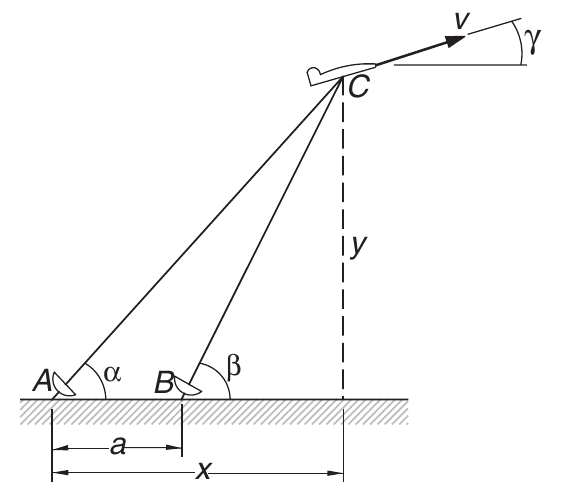


Las estaciones de radar $A$ y $B$, separadas por una distancia $a = 500 \, \text{m}$, rastrean un avión $C$ registrando los ángulos $\alpha$ y $\beta$ en intervalos de 1 segundo. Tres lecturas sucesivas son


```
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
```

Calcular la velocidad $v$ del avión y el ángulo de ascenso $\gamma$ en $t = 10 \, \text{s}$. Las coordenadas del avión pueden expresarse como:

$$
x = a \frac{\tan \beta}{\tan \beta - \tan \alpha}
$$

$$
y = a \frac{\tan \alpha \tan \beta}{\tan \beta - \tan \alpha}
$$

In [11]:
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
df

,t (s),alpha (°),beta (°)
0,9,54.80,65.59
1,10,54.06,64.59
2,11,53.34,63.62


In [12]:
t_s = [9, 10, 11]
alpha = [54.80, 54.06, 53.34]
beta = [65.59, 64.59, 63.62]

#Hallemos primeramente las coordenadas x & y

In [13]:
a = 500 #m
def coord_x(beta, alpha):
  return a * (np.tan(beta)/(np.tan(beta) - np.tan(alpha)))
def coord_y(beta, alpha):
  return a * ((np.tan(alpha) * np.tan(beta))/(np.tan(beta) - np.tan(alpha)))
coor_x = coord_x(beta[1], alpha[1])
coor_y = coord_y(beta[1], alpha[1])
print(f'Las coordenadas x & y en t = 10 son x = {coor_x} & y = {coor_y}')

Las coordenadas x & y en t = 10 son x = 436.6843721356098 & y = 333.9892694330522


#Hallemos las velocidades de cada componente

In [14]:
x = coord_x(beta, alpha)
y = coord_y(beta, alpha)

v_x = np.gradient(x, t_s)
v_y = np.gradient(y, t_s)

Para hallar el ángulo $\gamma$ usaremos la siguiente fórmula:

$$tan\, (\gamma) = \frac{v_y}{v_x}$$

In [15]:
Gamma = np.degrees(np.arctan(v_y[1]/v_x[1]))
print(f'El valor de γ es {Gamma:.2f}°')

El valor de γ es -26.79°


Para hallar la velocidad total usamos la siguiente fórmula:

$$v = \sqrt{v_x^2 + v_y^2}$$

In [16]:
v_total = np.sqrt((v_x[1] ** 2) + (v_y[1] **2))
print(f'La velocidad total es {v_total} m/s')

La velocidad total es 243.57896631480753 m/s


# 4.
Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:

```
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
```
- ¿Qué tan lejos viaja el objeto desde $t = 0$ hasta 28 s?
- ¿Cuál es la aceleración del objeto a $t = 28$ s?

In [17]:
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s

Generamos un polinomio interpolado con los datos dados para sacarle la integral usando quad.

In [18]:
t_interp4 = np.linspace(min(t), max(t), 100)
Pol_CS4 = CubicSpline(t, v)
Pol_interp4 = Pol_CS4(t_interp)
Integral,error = quad(Pol_CS4, 0, 28)
print(f'El objeto recorrió {Integral} en 28 s')

El objeto recorrió 2319.714323967968 en 28 s


Para saber cuál es la aceleración sacaremos la derivada del polinomio generado.

In [19]:
D_Pol_CS4 = Pol_CS4.derivative()
D28s = D_Pol_CS4(28)
print(f'En 28 s, la aceleración del objeto era: {D28s:.2f} m/s^2')

En 28 s, la aceleración del objeto era: 1.71 m/s^2


# 5.

El área superficial horizontal $A_s$ ($m^2$) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:

$$A_s(z) = -\frac{dV(z)}{dz}$$

donde:
- $V$ = volumen ($m^3$)
- $z$ = profundidad ($m$) medida desde la superficie hacia el fondo


La concentración promedio de una sustancia que varía con la profundidad $c$ ($g/m^3$) puede calcularse por integración:

$$c = \frac{\int_0^Z c(z)A_s(z) dz}{V_T}$$

donde:
- $Z$ = profundidad total (m)
- $V_T$ = volumen total del lago, dado también por:


$$V_T = \int_0^Z A_s(z) dz$$
Con base en los siguientes datos, determine la concentración promedio.
```
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
```

In [20]:
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)

Vamos primeramente a calcular $A_s(z)$, para esto generaremos un polinomio interpolador para que la derivada sea más precisa.

In [21]:
Pol_CS5 = CubicSpline(z, V)
A_s_1 = Pol_CS5.derivative()
A_s = lambda z: -A_s_1(z)

- Generamos el polinomio $c(z)$ para usarlo en el integrando.
- Se generan las dos integrales, la del denominador y la del numerador.
- Se evalúa la fracción en la posición 0 que es la que nos arroja el resultado de cada integral.

In [22]:
Pol_cz = CubicSpline(z, c)

Integrando_num = lambda z: Pol_cz(z) * A_s(z)
numerador = quad(Integrando_num, 0, Z)
denominador = quad(A_s, 0, Z)
c_prom = numerador[0]/denominador[0]
print(f'La concentración promedio es {c_prom:.2f} g/m^3')

La concentración promedio es 8.24 g/m^3


# 6.
La función de onda del electrón en estado 2s ($n=2$, $l=0$, $m=0$) en unidades radiales adimensionales es:

$$\psi_{200}(r,\theta,\varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}$$

La probabilidad de encontrar el electrón entre $r=0$ y $r=R$ está dada por:

$$P(R) = \frac{1}{8} \int_0^R r^2 (2 - r)^2 e^{-r} dr$$

donde las integrales angulares contribuyen un factor de $4\pi$.

- Calcule las probabilidades $P(R)$ para $R \in [10,25]$ con incrementos de 1 utilizando los métodos:
    - Trapezoidal
    - Simpson
    - Cuadratura
    
Garantizando que el error sea menor a $\varepsilon = 10^{-6}$
- Calcule la integral radial desde $r=0$ hasta $+\infty$, verifique que la probabilidad total sea 1.



In [29]:
n = 1
R_vals = np.arange(10, 26, n)
def f(r):
  return r**2 * (2 - r)**2 * np.exp(-r)
P_trap = []
P_simpson = []
P_quad = []

for R in R_vals:
  r = np.linspace(0, R, 1000)
  y = f(r)

  #Integral trapezoidal
  I_trapz = trapezoid(f(r), r)
  P_trap.append(I_trapz/8)

  #Integral simpson
  I_simp = simpson(f(r), r)
  P_simpson.append(I_simp/8)

  # Cuadratura con tolerancia de error < 1e-6
  I_quad, error = quad(f, 0, R, epsabs = 1e-6)
  P_quad.append(I_quad / 8)

P_total, error_total = quad(f, 0, np.inf, epsabs=1e-6)
P_total = P_total/8
print("\nProbabilidades P(R) para R de 10 a 25:\n")
for i in range(len(R_vals)):
    print(f"R = {R_vals[i]}:")
    print(f"  - Trapecio   = {P_trap[i]}")
    print(f"  - Simpson    = {P_simpson[i]}")
    print(f"  - Cuadratura = {P_quad[i]}\n")

print("Probabilidad total desde r = 0 hasta infinito:")
print(f"P_total = {P_total}")


Probabilidades P(R) para R de 10 a 25:

R = 10:
  - Trapecio   = 0.9404805251979101
  - Simpson    = 0.940480692414814
  - Cuadratura = 0.9404806920813824

R = 11:
  - Trapecio   = 0.9682228032057432
  - Simpson    = 0.9682229270220426
  - Cuadratura = 0.968222926533959

R = 12:
  - Trapecio   = 0.9835518591355285
  - Simpson    = 0.983551944222002
  - Cuadratura = 0.9835519435301404

R = 13:
  - Trapecio   = 0.9917076446257722
  - Simpson    = 0.9917076999831649
  - Cuadratura = 0.9917076990293141

R = 14:
  - Trapecio   = 0.9959130028731121
  - Simpson    = 0.9959130376295167
  - Cuadratura = 0.9959130363456059

R = 15:
  - Trapecio   = 0.9980248835342896
  - Simpson    = 0.9980249051226325
  - Cuadratura = 0.9980249034298898

R = 16:
  - Trapecio   = 0.999061782653768
  - Simpson    = 0.9990617964402695
  - Cuadratura = 0.9990617942483654

R = 17:
  - Trapecio   = 0.9995610511474713
  - Simpson    = 0.9995610607222427
  - Cuadratura = 0.9995610579284435

R = 18:
  - Trapecio   = 0.

# 7.
Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

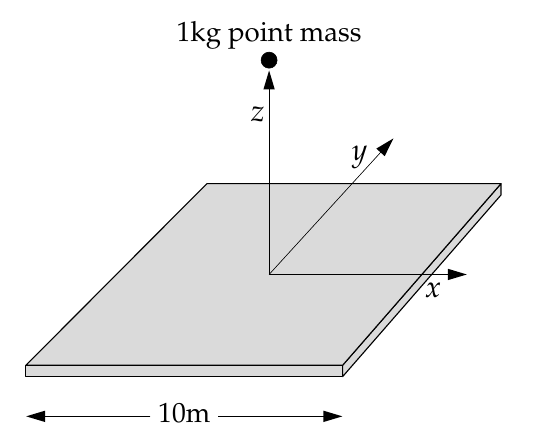

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje $z$ sobre una masa de prueba de 1 kg ubicada a distancia $z$ del centro de la lámina es:

$$F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx \, dy}{(x^2 + y^2 + z^2)^{3/2}}$$

donde $G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$, $\sigma = \frac{M}{L^2}$, $L = 10$ m y $M = 10,000$ kg.

- Calcular numéricamente esta integral doble.
- Graficar $F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m


Para z = 0.10 m la integral = 61.700671 y Fz = 4.117903e-08 N
Para z = 0.20 m la integral = 30.285309 y Fz = 4.042483e-08 N
Para z = 0.30 m la integral = 19.814273 y Fz = 3.967214e-08 N
Para z = 0.40 m la integral = 14.579597 y Fz = 3.892169e-08 N
Para z = 0.50 m la integral = 11.439684 y Fz = 3.817422e-08 N
Para z = 0.60 m la integral = 9.347330 y Fz = 3.743045e-08 N
Para z = 0.70 m la integral = 7.853733 y Fz = 3.669107e-08 N
Para z = 0.80 m la integral = 6.734483 y Fz = 3.595675e-08 N
Para z = 0.90 m la integral = 5.864908 y Fz = 3.522816e-08 N
Para z = 1.00 m la integral = 5.170198 y Fz = 3.450590e-08 N
Para z = 1.10 m la integral = 4.602744 y Fz = 3.379058e-08 N
Para z = 1.20 m la integral = 4.130802 y Fz = 3.308277e-08 N
Para z = 1.30 m la integral = 3.732392 y Fz = 3.238298e-08 N
Para z = 1.40 m la integral = 3.391809 y Fz = 3.169171e-08 N
Para z = 1.50 m la integral = 3.097535 y Fz = 3.100942e-08 N
Para z = 1.60 m la integral = 2.840926 y Fz = 3.033654e-08 N
Para z = 1.70 m la 

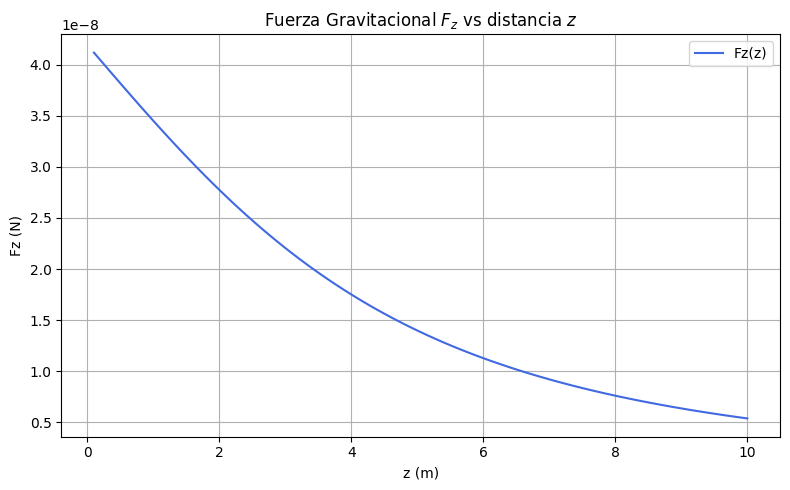

In [36]:
G = 6.674e-11  # constante de gravitación universal
L = 10         # lado de la lámina (m)
M = 10000      # masa de la lámina (kg)
sigma = M / L**2  # densidad superficial

# Definimos la función integrando
def integrando(y, x, z):
    return 1 / (x**2 + y**2 + z**2)**(3/2)

# Calculamos Fz para diferentes valores de z
z_vals = np.linspace(0.1, 10, 100)  # empezamos en 0.1 para evitar división entre 0
Fz_vals = []

for z in z_vals:
    integral, error = dblquad(
        integrando,
        -L/2, L/2,              # límites en x
        lambda x: -L/2,         # límites en y
        lambda x: L/2,
        args=(z,)               # pasamos z como parámetro fijo
    )
    Fz = G * sigma * z * integral
    Fz_vals.append(Fz)
    print(f"Para z = {z:.2f} m la integral = {integral:.6f} y Fz = {Fz:.6e} N")


# Graficamos Fz vs z
plt.figure(figsize=(8,5))
plt.plot(z_vals, Fz_vals, label="Fz(z)", color="royalblue")
plt.title("Fuerza Gravitacional $F_z$ vs distancia $z$")
plt.xlabel("z (m)")
plt.ylabel("Fz (N)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
